## Using Monte Carlo Techniques
## 5.2
Calculate the integral $\int_0^1 x^2dx=\frac{1}{3}$ using simple MC integration and importance sampling with $P(x)=x$

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [15]:
N = 500000

def trapezoids(func, xmin, xmax, nmax):
    Isim = func(xmin)+func(xmax)
    h = (xmax-xmin)/nmax
    for i in range(1,nmax):
        x = xmin+i*h
        Isim += 2*func(x)

    Isim *= h/2
    return Isim

def f(x):
    return x**2

I = trapezoids(f, 0., 1, N)
print('Trapezoids: {:.6f}, abs_error: {:.6f}'.format(I, abs(I-1/3)))

r = np.random.random(N)
I = np.sum(r**2)/float(N)
print('Simple MC: {:.6f}, abs_error: {:.6f}'.format(I, abs(I-1/3)))

x = r
I = np.sum(x)/float(N)
print('Importance sampling: {:.6f}, abs_error: {:.6f}'.format(I, abs(I-1/3)))



Trapezoids: 0.333333, abs_error: 0.000000
Simple MC: 0.333648, abs_error: 0.000314
Importance sampling: 0.500199, abs_error: 0.166866


## 5.3 The result of this one seems not good...still need bunch of modifications
Calculate the integral $\int_0^1 \sqrt x dx=\frac{2}{3}$ using simple MC integration and importance sampling with $P(x)=1-e^{-ax}$ Find the values of $a$ that minimizes the variance.

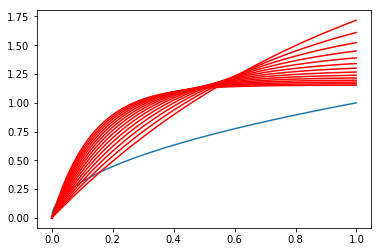

In [62]:
plt.figure()

arange = np.arange(1,8,0.5)
x = np.arange(0,1.,0.001)
plt.plot(x,np.sqrt(x))
for ai in arange:
    norm = (ai-1+np.exp(-ai))/ai
    P = (1-np.exp(-ai*x))/norm
    plt.plot(x,P,'r')

Trapezoids:  0.6666666600968952
Simple Monte Carlo:  0.6658337474397429
Importance Sampling:
4.0 0.9512030375956676 0.00579541036768219
4.1 0.9438621138430797 0.005718527812966412
4.199999999999999 0.9366665204369201 0.005644543451662753
4.299999999999999 0.9296123611819684 0.005573283855766298
4.399999999999999 0.9226958486264843 0.00550458953887132
4.499999999999998 0.9159133019836599 0.0054383135616960275
4.599999999999998 0.9092611449854134 0.005374320303668081
4.6999999999999975 0.902735903681849 0.00531248437798916
4.799999999999997 0.8963342041962837 0.005252689670323609
4.899999999999997 0.8900527704479967 0.005194828485356234


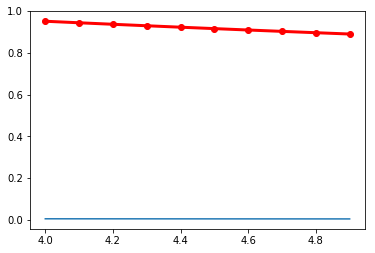

In [58]:
# Trapezoidal integration
N=100000
def g(x):
    return np.sqrt(x)

print("Trapezoids: ", trapezoids(g, 0., 1, N))

# Simple Monte Carlo integration
n0 = N
a = np.arange(4.,5.,0.1)
I = np.zeros(np.size(a))
Ivar = np.zeros(np.size(a))


r = np.random.random(n0)

I0 = np.sum(g(r))
print("Simple Monte Carlo: ", I0/n0)

# Importance Sampling
print("Importance Sampling:")
              
i = 0
for ai in a:
    norm = (ai-1+np.exp(-ai))/ai #You need a normalized probability distribution
    x = 1-r*norm
    Itot = 0.
    Nin = 0
    I2 = 0.
    for xi in x:
        if(xi > 0):
            xi = -np.log(xi)/ai
            if ((xi > 0)&(xi <=1)):
                Nin += 1
                Itot += g(xi)/(1-np.exp(-xi*ai))
                I2 += (g(xi)/(1-np.exp(-xi*ai)))**2

    Itot *= norm
    I2 *= norm

    I[i] = Itot/Nin
    Ivar[i]=np.sqrt(abs(Itot**2/Nin**2-I2/Nin))/np.sqrt(Nin)
    print(ai,Itot/Nin,Ivar[i])
    i += 1
    
plt.plot(a,I,ls='-',marker='o',c='red',lw=3);
plt.plot(a,Ivar)

